In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt

# Desafio Final - Correlação e Regressão Simples/Multivariada

> **Aluna: Ana Luisa Fuchs da Silveira**

## Considerando a base de dados kc_house_data.csv responda as questões de 1 a 6 abaixo:

> Leitura do arquivo e primeiras análises

In [ ]:
df = pd.read_csv('kc_house_data.csv')

In [ ]:
#Visualização inicial do dataframe
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,n,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,n,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,n,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,n,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,n,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
#Informações sobre os tipos de dados e valores nulos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             9999 non-null   int64  
 1   date           9999 non-null   object 
 2   price          9999 non-null   float64
 3   bedrooms       9999 non-null   int64  
 4   bathrooms      9999 non-null   float64
 5   sqft_living    9999 non-null   int64  
 6   sqft_lot       9999 non-null   int64  
 7   floors         9999 non-null   float64
 8   waterfront     9999 non-null   object 
 9   view           9999 non-null   int64  
 10  condition      9999 non-null   int64  
 11  grade          9999 non-null   int64  
 12  sqft_above     9999 non-null   int64  
 13  sqft_basement  9999 non-null   int64  
 14  yr_built       9999 non-null   int64  
 15  yr_renovated   9999 non-null   int64  
 16  zipcode        9999 non-null   int64  
 17  lat            9999 non-null   float64
 18  long    

#### 1. Codifique e exiba a matriz de correlação entre as variáveis numéricas. Além disso, qual é a correlação entre o preço price e o número de quartos bedrooms? Existe alguma diferença na correlação quando consideramos apenas casas com uma área total sqft_living superior a 2000 pés quadrados?

> Codifique e exiba a matriz de correlação entre as variáveis numéricas:

In [ ]:
df_values = df.corr(numeric_only=True)

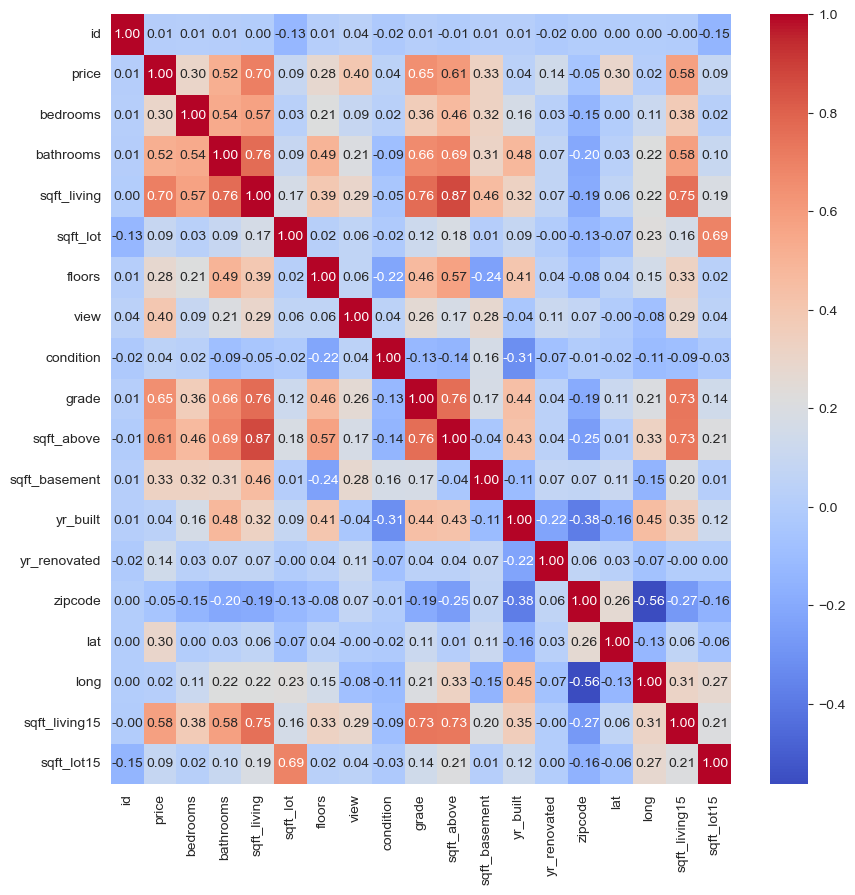

In [ ]:
plt.figure(figsize=(10, 10))
sns.heatmap(df_values,  annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

Como existe diversas correlações, é interessante filtrar as correlações que são mais fortes, ou seja, que possuem valores acima de 0.5 ou abaixo de -0.5.

In [ ]:
df_correlation = df_values[abs(df_values) >= 0.5]

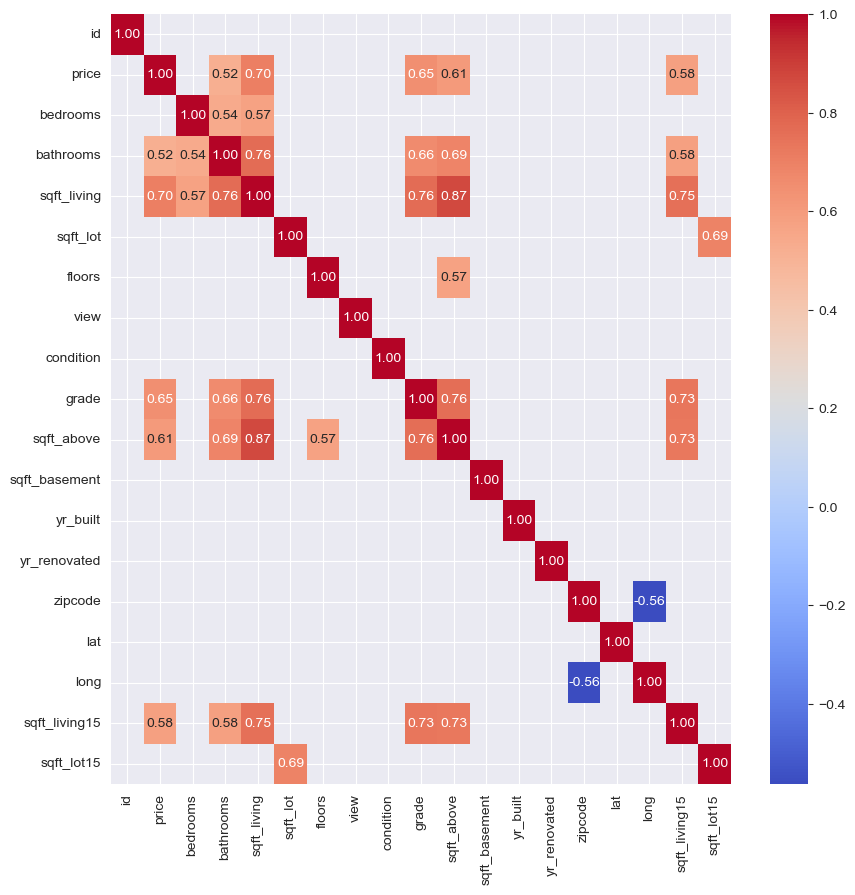

In [ ]:
plt.figure(figsize=(10, 10))
sns.heatmap(df_correlation,  annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

Ao filtrar o heatmap, fica mais clara algumas correlações, tais como:
* Notas de avaliação (grade) e preço (price) possuem uma correlação de 0.65, indicando que casas com notas de avaliação mais altas tendem a ser mais caras.
* Locais com maior área de estar (sqft_living) tendem a ter melhores avaliações, com uma correlação de 0.76.
* Locais com sqft_living e sqft_above possuem uma correlação de 0.87, indicando que a área de estar é maior que a área acima do solo.

> Além disso, qual é a correlação entre o preço price e o número de
quartos bedrooms?

In [ ]:
#Realizar a correlação de número de quartos x preço.
cor_preco_quarto = df['price'].corr(df['bedrooms'])

print(f'A correlação entre preço e número de quartos é {cor_preco_quarto:.2f}, ')
if cor_preco_quarto < 0.5:
    print('o que indica uma falta de correlação entre o preço e número de quartos')
else:
    print('o que indica a existência de correlação entre o preço e número de quartos')

A correlação entre preço e número de quartos é 0.30, 
o que indica uma falta de correlação entre o preço e número de quartos


<Axes: xlabel='price', ylabel='bedrooms'>

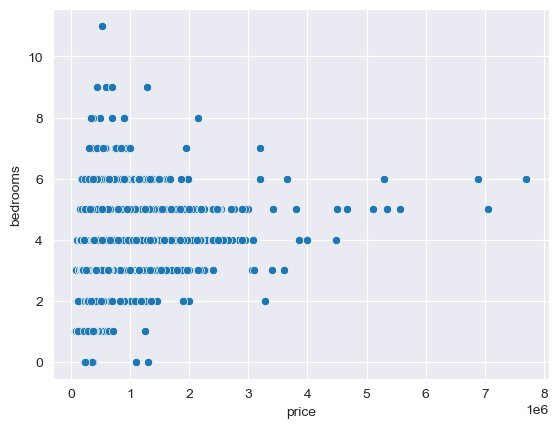

In [ ]:
#Realização de scatterplot para confirmar a suspeita de correlação baixa:
sns.scatterplot(data=df, x='bedrooms', y='price')

Percebemos, avaliando o scatterplot, que a correlação entre o número de quartos e o preço é baixa, o que indica que o número de quartos não é um fator determinante para o preço das casas. E, visualmente, percebe-se a maioria das casas possuem 3 quartos, e o preço varia bastante, o que indica mais fortemente a falta de correlação - pois existem preços altos com casas de 2 ou 3 quartos, e preços menores com casas de 5 ou 6 quartos.

> Existe alguma diferença na correlação quando consideramos apenas casas com uma área total sqft_living superior a 2000 pés quadrados?

In [ ]:
#Repetindo o mesmo passo anteriormente, porém considerando casas com área total superior a 2000 pés quadrados em um filtro.
cor_preco_area = df[df['sqft_living'] > 2000]['sqft_living'].corr(df['price'])

print(f'A correlação entre preço e número de quartos é {cor_preco_area:.2f}, ')
if cor_preco_area < 0.5:
    print('o que indica uma falta de correlação entre o preço e a área total da casa')
else:
    print('o que indica a existência de correlação entre o preço e a área total da casa')

A correlação entre preço e número de quartos é 0.69, 
o que indica a existência de correlação entre o preço e a área total da casa


<Axes: xlabel='sqft_living', ylabel='price'>

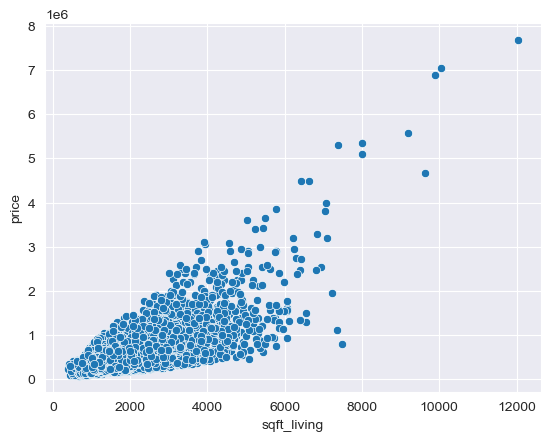

In [ ]:
#Realização de um scatterplot para confirmar a suspeita de correlação:
sns.scatterplot(data=df, x='sqft_living', y='price')

Ao avaliar o scatterplot e analisar em conjunto com o valor obtido de 0.68, percebe-se que existe uma grande quantidade de casas com área total superior a 2000 pés quadrados, e o preço possuindo uma maior concentração entre valores de 10 a 50 mil, porém de forma sutil e crescente, o que indica que a correlação entre a área total da casa e o preço. Assim, é possível concluir uma correlação entre preço e tamanho da área da casa é mais forte do que a correlação entre o número de quartos e o preço.

#### 2. Existe alguma correlação entre o preço price e a área total da casa sqft_living, considerando apenas casas com pelo menos dois banheiros bathrooms?

In [ ]:
#Realização da correlação entre o preço e a área total da casa, considerando casas com pelo menos 2 banheiros.
cor_preco_2banheiros = df['price'].corr(df['sqft_living'].where(df['bathrooms'] >= 2))

print(f'A correlação entre preço e número de quartos é {cor_preco_2banheiros:.2f}, ')
if cor_preco_2banheiros < 0.5:
    print('o que indica uma falta de correlação entre o preço e a área total da casa em casas com pelo menos 2 banheiros')
else:
    print('o que indica a existência de correlação entre o preço e a área total da casa em casa com pelo menos 2 banheiros')

A correlação entre preço e número de quartos é 0.71, 
o que indica a existência de correlação entre o preço e a área total da casa em casa com pelo menos 2 banheiros


<Axes: xlabel='sqft_living', ylabel='price'>

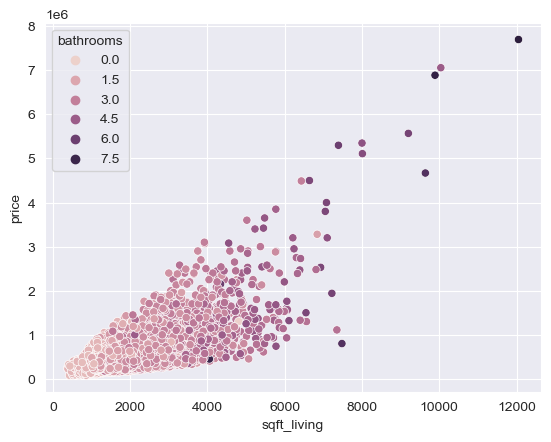

In [ ]:
#Visualização gráfica da relação entre preço e área total da casa, considerando casas com pelo menos 2 banheiros
sns.scatterplot(data=df, x='sqft_living', y='price', hue='bathrooms')

Ao avaliar o scatterplot e analisar em conjunto com o valor obtido de 0.57, percebe-se que existe uma correlação entre o preço e a área total da casa, considerando casas com pelo menos 2 banheiros. A avaliação do scatterplot separado por cores percebe-se que casas mais caras possuem maior número de banheiros, os pontos são mais escuros (diferente das casas mais baratas, onde existe uma massiva quantidade de pontos mais claros, com menos banheiros).  Isso leva a inferir que a presença de mais banheiros influencia na correlação entre a área total da casa e o preço, indicando que casas com pelo menos 2 banheiros tendem a ter uma correlação mais forte entre a área total da casa e o preço.

### 3. Como a quantidade de banheiros bathrooms influencia na correlação entre a área total da casa sqft_living e o preço price?


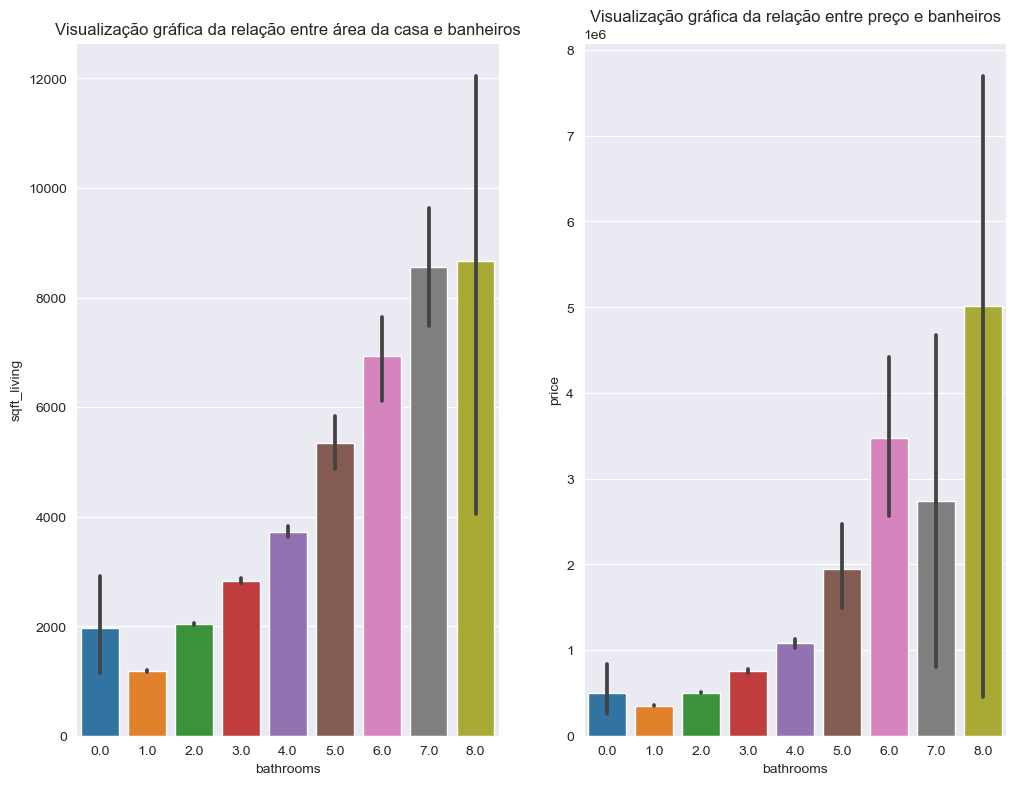

In [ ]:
#Verificação visual de correlação entre o número de banheiros x preço x total da área
fig, ax = plt.subplots(1, 2, figsize=(12, 9))
ax[0].set_title('Visualização gráfica da relação entre área da casa e banheiros')
ax[1].set_title('Visualização gráfica da relação entre preço e banheiros')
sns.barplot(data=df, x=round(df['bathrooms']), y='sqft_living', ax=ax[0])
sns.barplot(data=df, x=round(df['bathrooms']), y='price', ax=ax[1])
plt.show()

Ao analisar os gráficos, é perceptível que, a medida que o número de banheiros aumenta, a área total da casa e o preço também aumentam. Isso indica que a quantidade de banheiros influencia na correlação entre a área total da casa e o preço. É notável que o crescimento é mais constante em relação a área total da casa, enquanto o preço possui um crescimento com algumas variações. Todavia, é perceptível a presença de certa correlação.

<Axes: >

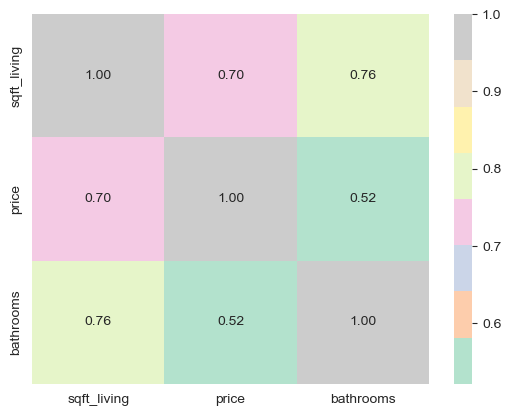

In [ ]:
#Verificação da correlação e heatmap da mesma em relação a essas três variáveis (tamanho da casa, preço e número de banheiros)
cor_banheiro_preco = df[['sqft_living', 'price', 'bathrooms']].corr()

sns.heatmap(cor_banheiro_preco, annot=True, cmap='Pastel2', fmt='.2f')

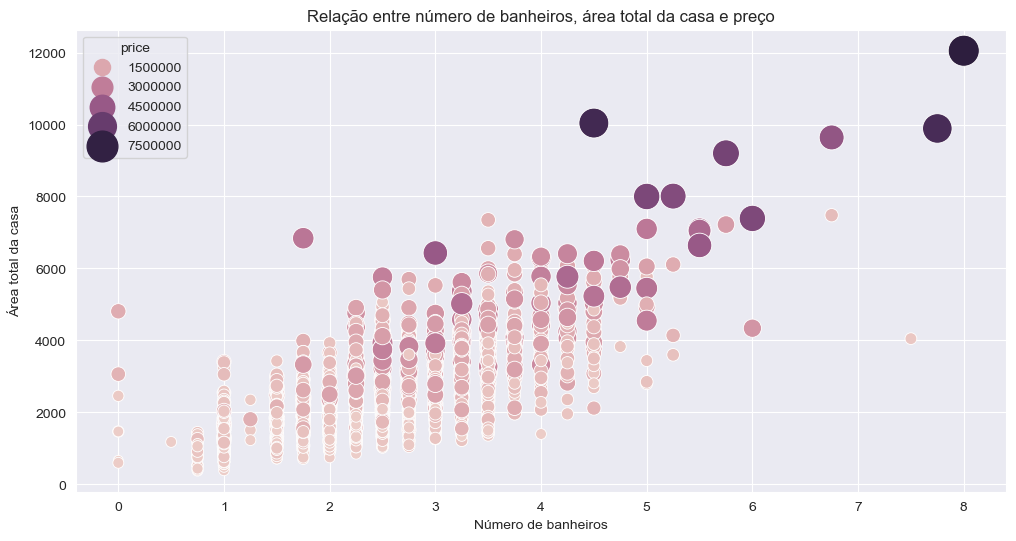

In [ ]:
#Outra representação visual, desta vez utilizando um scatterplot, verificando a correlação entre as três variáveis:
df = df.dropna(subset=['price'])
plt.figure(figsize=(12, 6))
scatter_plot = sns.scatterplot(data=df, x='bathrooms', y='sqft_living', hue='price', color=' ', size='price', sizes=(50, 500))
plt.xlabel('Número de banheiros')
plt.ylabel('Área total da casa')
plt.title('Relação entre número de banheiros, área total da casa e preço')
plt.show()

Avaliando todas as informações obtidas até agora (o valor da correlação entre banheiro x área e banheiro x preço, é perceptível que a presença de mais banheiros não é um forte influenciador no preço em relação as correlações, porém é um grande fator se considerar a área do imóvel - e este correlaciona-se com o preço. Isso indica que a presença de mais banheiros influencia na correlação entre a área total da casa e o preço, mas não é um fator determinante para o preço.

### 4. Qual é a relação entre a condição da casa condition e o preço price, considerando apenas casas com uma área total sqft_living superior a 3000 pés quadrados?

In [ ]:
#Realização do filtro para casas com área total superior a 3000 pés quadrados
df_filtered = df[df['sqft_living'] > 3000]
cor_preco_condicao = df_filtered[['sqft_living', 'price']].corr()

print(f'A correlação entre preço e condição da casa é {cor_preco_condicao.values[0][1]:.2f}, o que indica')
if cor_preco_condicao.values[0][1] < 0.5:
    print('uma falta de correlação entre o preço e a condição da casa com área total superior a 3000 pés quadrados')
else:
    print('a existência de correlação entre o preço e a condição da casa com área total superior a 3000 pés quadrados')

A correlação entre preço e condição da casa é 0.67, o que indica
a existência de correlação entre o preço e a condição da casa com área total superior a 3000 pés quadrados


In [ ]:
#A fim de comparação, podemos verificar a correlação em casas menores que 3000 pés quadrados.
df_filtered_abaixo3k = df[df['sqft_living'] < 3000]
corr_abaixo3k = df_filtered_abaixo3k[['sqft_living', 'price']].corr()

print(f'A correlação entre preço e condição da casa é {corr_abaixo3k.values[0][1]:.2f}, diferente do valor obtido em casas com sqt_living > 3000, que é {cor_preco_condicao.values[0][1]:.2f}')

A correlação entre preço e condição da casa é 0.51, diferente do valor obtido em casas com sqt_living > 3000, que é 0.67


<Axes: xlabel='sqft_living', ylabel='price'>

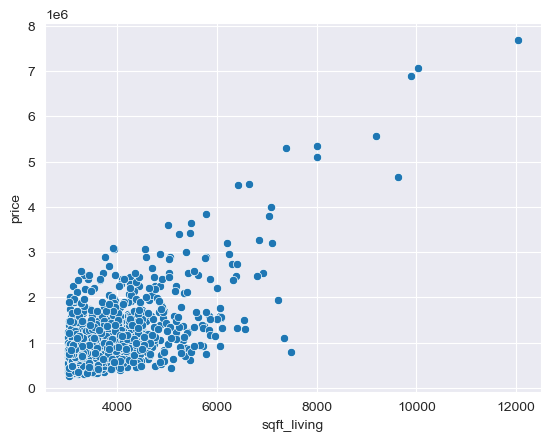

In [ ]:
#Visualização gráfica da relação entre preço e área total da casa, considerando casas com pelo menos 2 banheiros
sns.scatterplot(data=df_filtered, x='sqft_living', y='price')

Ao observar o scatterplot e analisar em conjunto com o valor obtido de 0.67, percebe-se que existe uma ligeira correlação entre o preço e a condição da casa, considerando casas com área total superior a 3000 pés quadrados. A avaliação do scatterplot indica que a correlação entre preço e condição da casa é mais forte em casas com área total superior a 3000 pés quadrados, o que, em casas com sqft_live < 3000 ocorre um valor menor (de 0.51), indicando que a condição da casa influencia na correlação entre a área total da casa e o preço em lotes maiores.

### 5. Existe alguma correlação entre a localização geográfica lat e long e o preço price para casas com pelo menos três quartos bedrooms?

In [ ]:
#Realizaremos o filtro de banheiro inicialmente e depois verificar a latitude e longitude em relação aos imóveis com 3 quartos ou mais.
df_filtrado = df[df['bedrooms'] >= 3]

cor_lat, cor_long = df_filtrado['price'].corr(df_filtrado['lat']), df_filtrado['price'].corr(df_filtrado['long'])

print('A correlação entre preço e latitude é {:.2f}, enquanto a correlação entre preço e longitude é {:.2f}'.format(cor_lat, cor_long))

A correlação entre preço e latitude é 0.31, enquanto a correlação entre preço e longitude é -0.01


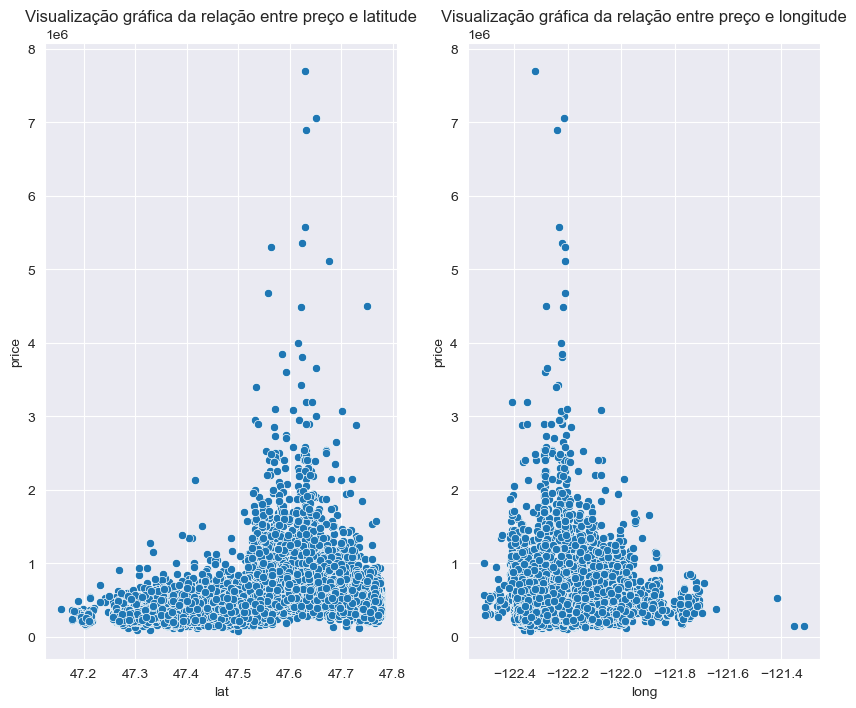

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(10, 8))
ax[0].set_title('Visualização gráfica da relação entre preço e latitude')
ax[1].set_title('Visualização gráfica da relação entre preço e longitude')
sns.scatterplot(data=df_filtrado, x='lat', y='price', ax=ax[0])
sns.scatterplot(data=df_filtrado, x='long', y='price', ax=ax[1])
plt.show()

Observando o scatterplot, percebe-se um deslocamento de quantidade de imóveis para a direita em relação à latitude e preços (ou seja, casas com latitude em torno de 47.5 e 47.8 possuem preços mais elevados), e o valor obtido foi de 0.31. Não muito significativo, porém isso pode ser devido a quantidade de dados presente na base - seria indicado uma avaliação amostral de cada região. Analisando em soma ao scatterplot, este corrobora com o dado indicado (uma massiva quantidade de imóveis na base, porém percebe-se uma ligeira correlação entre preço e latitude na faixa indicada anteriormente. E, na longitude, é perceptível esse mesmo deslocamento para a esquerda (casas com longitude em torno de -122.2 e -122.4 possuem preços mais elevados). Isso indica que existe uma correlação entre a localização geográfica e o preço para casas com pelo menos três quartos. Porém, novamente, devido a base de dados e ao alto volume de imóveis presentes, os valores não são estatisticamente significativos, mas corroboram com a premissa do o resultado obtido em .corr(), sendo longitude uma correlação negativa (visto que essa trata-se de um deslocamento para a esquerda e valores negativos), e latitude uma correlação positiva.

### 6. Calcule a correlação entre uma variável categórica(waterfront) e uma variável numérica(price) usando ANOVA

Considerando as hipóteses:
* H0 = Não há relação entre a variável categórica e a variável numérica
* H1 = Há relação entre a variável categórica e a variável numérica

In [ ]:
#Se houvesse a necessidade de contabilizar os valores, a utilização de dummies seria interessante visto que as variáveis categóricas waterfront são 'y' e 'n'. Nesse caso, não utilizei, mas deixei o código disponível.
df['waterfront_dummies'] = df['waterfront'].map({'y': 1, 'n': 0})

In [ ]:
#Teste anoa
anova_teste = stats.f_oneway(df[df['waterfront'] == 'y']['price'], df[df['waterfront'] == 'n']['price'])

print('O teste estatístico ANOVA realizado resultou em um p-valor de {}'.format(anova_teste.pvalue))

if anova_teste.pvalue < 0.05:
    print('A variável categórica waterfront (ou seja, a presença ou ausência de frente para a água) não tem influência significativa no preço das casas')
else:
    print('A variável categórica waterfront (ou seja, a presença ou ausência de frente para a água) tem influência significativa no preço das casas')

O teste estatístico ANOVA realizado resultou em um p-valor de 2.97380815121432e-202
A variável categórica waterfront (ou seja, a presença ou ausência de frente para a água) não tem influência significativa no preço das casas


<Axes: xlabel='waterfront', ylabel='price'>

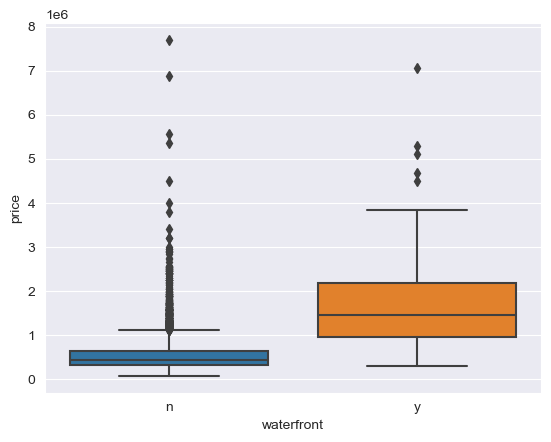

In [ ]:
#Visualização gráfica da relação entre preço e variável categórica waterfront
sns.boxplot(data=df, x='waterfront', y='price')

Ao visualizar o boxplot, percebe-se uma diferença da mediana e média de preços com a presença ou ausência de frente para a água. A presença de frente para a água possui uma mediana e média de preços mais elevados, indicando que a presença de frente para a água influencia no preço das casas. O teste ANOVA realizado resultou em um p-valor de 0.0, indicando que a variável categórica waterfront (ou seja, a presença ou ausência de frente para a água) tem influência significativa no preço das casas, e esse valor provavelmente deve-se à presença de valores altos/outliers em casas sem frente para a água, que influenciam no resultado do teste. O indicado seria uma limpeza dos dados e remoção de outliers ou uma nova validação separando em grupos com mais fatores presentes (tamanho do imóvel, localização, etc.)

## Considerando a base de dados car_price.csv responda as questões de 7 a 11 abaixo:

> Primeiras análises, leitura do dataframe e informações iniciais.

In [ ]:
df2 = pd.read_csv('car_price.csv')

In [ ]:
#Informações sobre as colunas presentes no dataframe
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1874 entries, 0 to 1873
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Make                1874 non-null   object 
 1   Model               1874 non-null   object 
 2   Price               1874 non-null   int64  
 3   Year                1874 non-null   int64  
 4   Kilometer           1874 non-null   int64  
 5   Fuel Type           1874 non-null   object 
 6   Transmission        1874 non-null   object 
 7   Location            1874 non-null   object 
 8   Color               1874 non-null   object 
 9   Owner               1874 non-null   object 
 10  Seller Type         1874 non-null   object 
 11  Engine              1874 non-null   object 
 12  Max Power           1874 non-null   object 
 13  Max Torque          1874 non-null   object 
 14  Drivetrain          1874 non-null   object 
 15  Length              1874 non-null   float64
 16  Width 

### 7. Codifique e exiba a Matriz de correlação para as variáveis numéricas e dê exemplos de correlações positivas, negativas e neutras

In [ ]:
df2.head()

,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,Engine,Max Power,Max Torque,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
0,Honda,Amaze 1.2 VX i-VTEC,505000,2017,87150,Petrol,Manual,Pune,Grey,First,Corporate,1198 cc,87 bhp @ 6000 rpm,109 Nm @ 4500 rpm,FWD,3990.0,1680.0,1505.0,5.0,35.0
1,Maruti Suzuki,Swift DZire VDI,450000,2014,75000,Diesel,Manual,Ludhiana,White,Second,Individual,1248 cc,74 bhp @ 4000 rpm,190 Nm @ 2000 rpm,FWD,3995.0,1695.0,1555.0,5.0,42.0
2,Hyundai,i10 Magna 1.2 Kappa2,220000,2011,67000,Petrol,Manual,Lucknow,Maroon,First,Individual,1197 cc,79 bhp @ 6000 rpm,112.7619 Nm @ 4000 rpm,FWD,3585.0,1595.0,1550.0,5.0,35.0
3,Toyota,Glanza G,799000,2019,37500,Petrol,Manual,Mangalore,Red,First,Individual,1197 cc,82 bhp @ 6000 rpm,113 Nm @ 4200 rpm,FWD,3995.0,1745.0,1510.0,5.0,37.0
4,Toyota,Innova 2.4 VX 7 STR [2016-2020],1950000,2018,69000,Diesel,Manual,Mumbai,Grey,First,Individual,2393 cc,148 bhp @ 3400 rpm,343 Nm @ 1400 rpm,RWD,4735.0,1830.0,1795.0,7.0,55.0


In [ ]:
#Cópia do dataframe para evitar alterações no original
df2_copy = df2.copy()

> Para avaliar força e motor, realizei a separação de todos os valores. Porém, a fim de uma análise mais geral e menos enviesada, poderíamos utilizar apenas "Engine" para motor, podendo até arredondar para 2 casas (tais quais os motores que vemos no dia-a-dia, a 1.6, 1.2, 1.8, 1.0, etc) e apenas o "Max Power" e utilizar o BHP, sendo uma medida de potência no veículo (cavalo), uma medida mais realista.

In [ ]:
#Visto anteriormente a presença de colunas categóricas (object64) com valores que podem vir a ser importantes para a análise de correlação, é importante extrair valores numéricos de colunas que possuem valores mistos (numéricos e não numéricos), como nas colunas. Então criei a função para filtrar os valores das colunas.

def extract_values(df):
    for column in df.columns:
            if column == 'Max Power':
                df['NM_power'] = df['Max Power'].str.split('@').str[0]
                df['NM_power'] = df['NM_power'].str.extract('(^\d+)').astype('int64')
                df['RPM_power'] = df['Max Power'].str.split('@').str[1]
                df['RPM_power'] = df['RPM_power'].str.split().str[0].astype('float64')

            if column == 'Max Torque':
                df['NM_torque'] = df['Max Torque'].str.split('@').str[0]
                df['NM_torque'] = df['NM_torque'].str.extract('(^\d+)').astype('int64')
                df['RPM_torque'] = df['Max Torque'].str.split('@').str[1]
                df['RPM_torque'] = df['RPM_torque'].str.split().str[0].astype('float64')

            if column == 'Engine':
                df['Engine'] = df['Engine'].str.replace('cc', '')
                df['Engine'] = df['Engine'].astype('int64')

    return df


In [ ]:
#Utilização da função para extrair valores numéricos e transformar valores mistos em valores numéricos para análise de correlação
df2_copy = extract_values(df2_copy)

<Axes: >

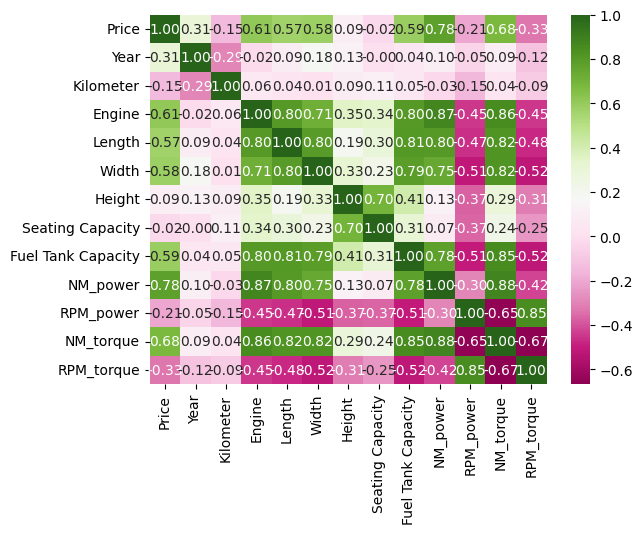

In [ ]:
#Criação da matriz de correlação
df_corr = df2_copy.corr(numeric_only=True)

sns.heatmap(df_corr, annot=True, cmap='PiYG', fmt='.2f')

Ao utilizar a função `.corr()`  em adição ao heatmap, se torna mais visível as correlações calculadas.
Em tons mais verdes, temos correlações positivas, enquanto em tons de rosa temos correlações negativas.

 As correlações positivas indicam que o valor, quanto mais próximo de um (+1), os valores são correlacionadas proporcionalmente, ou seja, quando uma aumenta, a outra também aumenta. Exemplos de correlações positivas mais notadas (consideradas em valores acima de 0.5):
 * A capacidade total do tanque (fuel tank capacity) e a largura e comprimento do carro (width e length), possuem uma correlação de 0.81 e 0.79, respectivamente.Quanto maior a largura e comprimento do carro, a capacidade total do tanque tende a ser elevada.
 * Temos, também, a presença de correlação positiva entre o preço (price) e o motor (engine), juntamente com a potência do motor, indicando que carros com motores mais potentes tendem a ser mais caros.
 * Existe a presença de correlação positiva em número de assentos (seating capacity) com a altura, indicando que carros maiores e mais altos tendem a ter mais assentos (vans, carros familiares, etc).
 * O tamanho do tanque e sua capacidade total máxima (fuel tank capacity) também está positivamente correlacionado com o motor (Engine) e sua força (medido em Newtons, NM) e, portanto, carros com mais capacidade de combustível tendem a ter mais força de motor.

As correlações negativas já indicam que o valor, quanto mais próximo de menos um (-1), os valores se correlacionam de forma inversamente proporcional, ou seja, quando uma aumenta, a outra também diminui. Sendo assim, existe uma correlação, porém de crescimentos negativos.
Exemplos de correlações negativas mais notadas:
* A força de rotação dos carros (medidas em RPM) é negativamente correlacionada com a altura e largura (-.048, -0.52), indicando que carros mais altos e largos tendem a ter motores com menos rotação máxima, e, pensando que geralmente a maior eficiência do carro em baixa rotação se dão com carros pra lidar com peso (caminhonetes, etc.), faz sentido a presença dessa correlação.
* Avaliando a força de torque (medida em NM) e sua potência de rotação máxima (RPM), percebe-se uma correlação negativa de -0.67, indicando que carros com mais força de torque (NM) tendem a ter motores com menos rotação máxima, correlacionando a necessidade de maior eficiência de carros fortes com baixa rotação, e maior velocidade para carros esportivos com alta rotação e baixo torque.
*  Carros com mais rotação máxima em RPM (tanto ao avaliar sua potência quanto o torque) tendem a ter uma capacidade de tanque máxima reduzida (correlação negativa de -0.51), ou seja, carros com tanques maiores possuem menores rotações máximas. E em carros esportivos, geralmente a maior eficiência do carro se dá em alta rotação, pois com força reduzida reduz a velocidade máxima.
* Ano de fabricação do carro possui uma ligeira correlação negativa com a quilometragem (-0.29), indicando que quanto mais antigo o carro, a quilometragem tende a aumentar.

Já as correlações neutras são os valores mais próximos de zero, indicando pouca ou nenhuma correlação entre as variáveis. As mais interessantes a se avaliar neste exemplo, são:
* Capacidade de assentos (seating capacity) e price, possui valor de -0.02. É próximo de zero, o que não leva a uma correlação substancial, todavia é negativa - indicando uma leve influência negativa no número de assentos em relação ao preço. Provavelmente se dá aos modelos mais caros e esportivos que diminuem os assentos para apenas dois, sendo casos mais extremos.
* Outra correlação neutra é o Fuel Tank Capacity (capacidade máxima do tanque) com o ano de fabricação (0.04), indicando que a capacidade do tanque não é influenciada pelo ano de fabricação do carro.
* Outra correlação neutra existente é a presença de mais assentos (seating capacity) com a largura e altura do carro (entre 0.2 e 0.3), indicando que carros mais largos e altos possuem mais assentos, mas não de forma significativa como é na presença da altura (que carros mais altos certamente possuem mais assentos).

### 8. Codifique e exiba Gráficos de Dispersão para cada uma das variáveis numéricas em relação à variável de interesse Price.


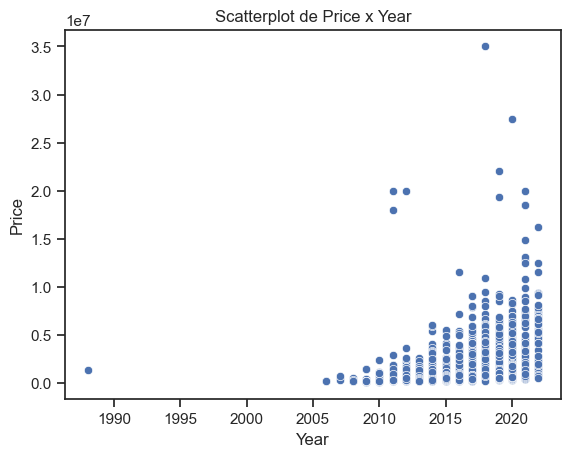

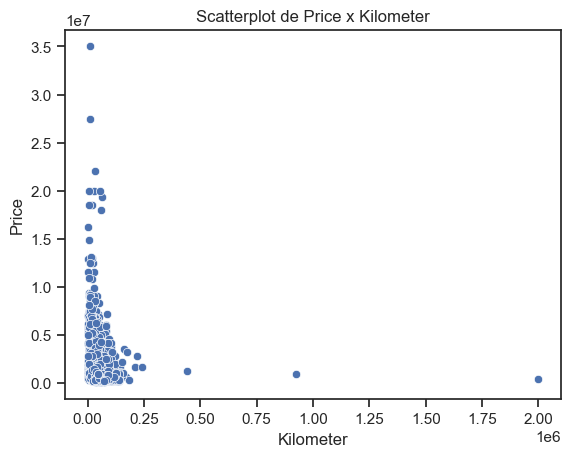

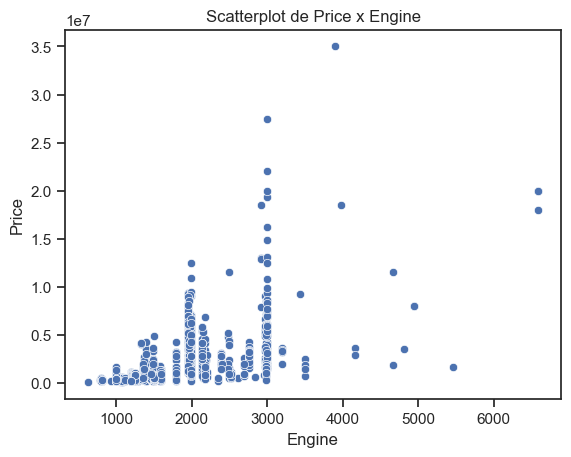

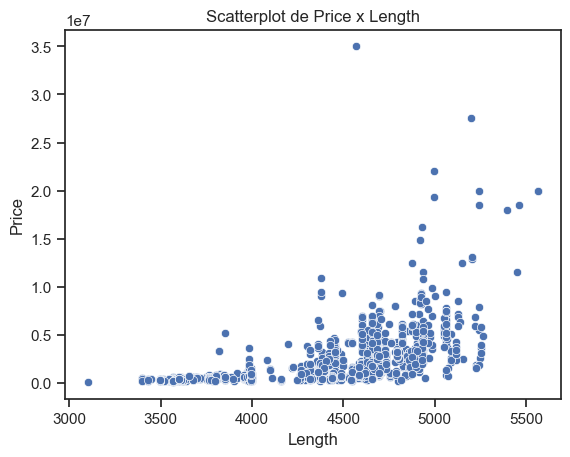

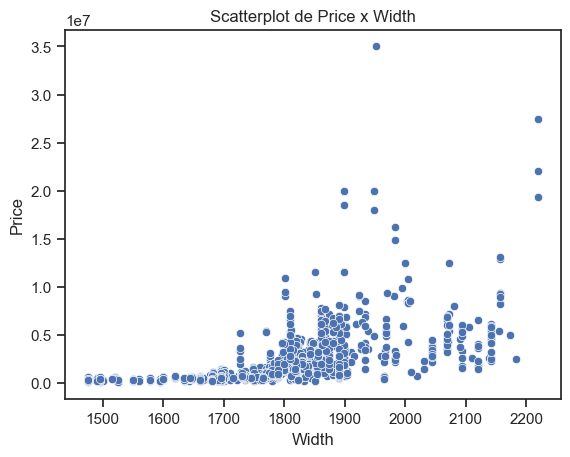

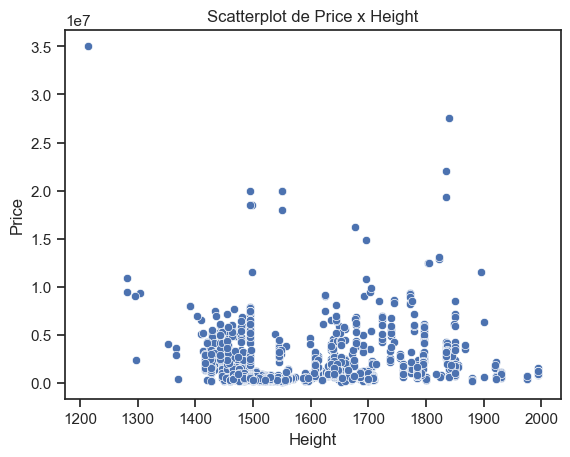

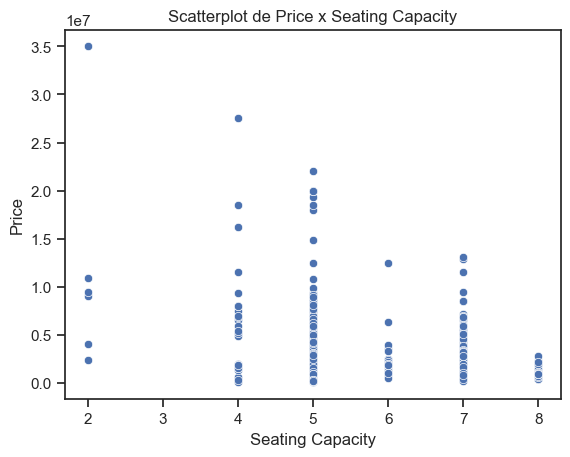

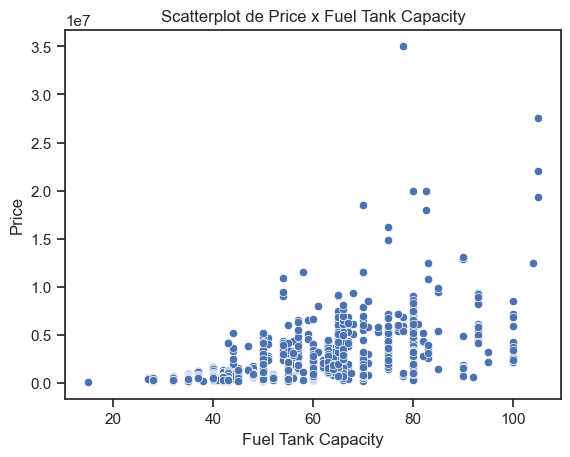

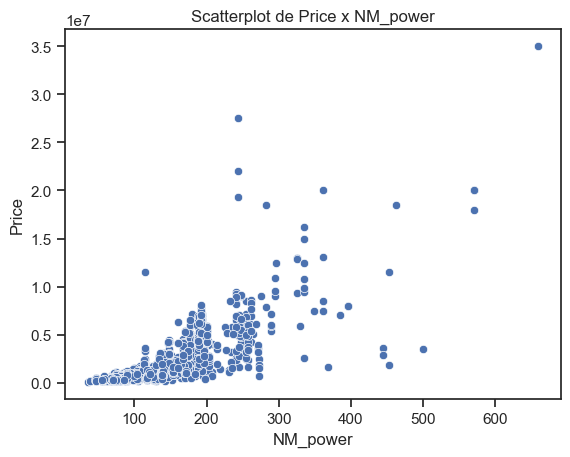

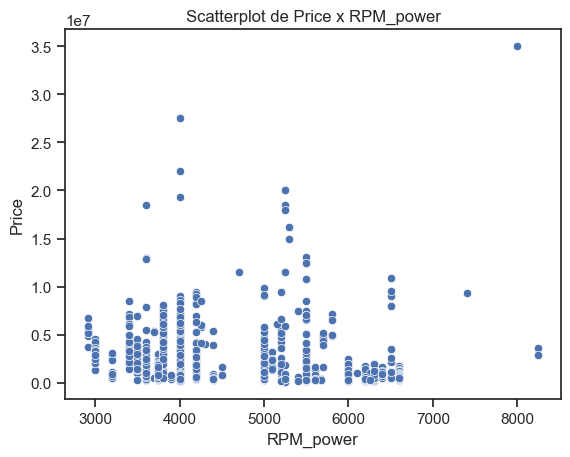

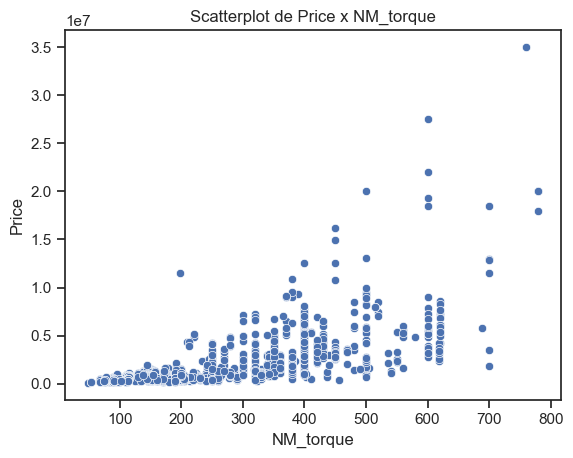

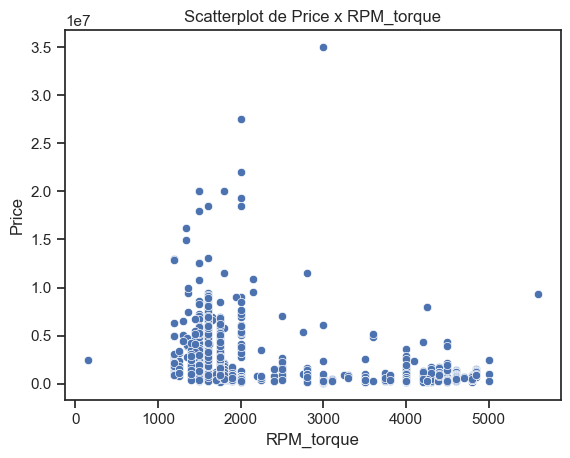

In [ ]:
#Para realizar gráficos de dispersão para cada variável numérica, utilizei um loop for pelo meu dataframe filtrado em valores numéricos.
numeric_columns = df2_copy.select_dtypes(include=['float64', 'int64'])
numeric_columns = numeric_columns.drop('Price', axis=1)
for column in numeric_columns.columns:
        sns.scatterplot(data=df2_copy, x=column,  y='Price')
        plt.title(f'Scatterplot de Price x {column}')
        plt.show()

Devido a quantidade de imóveis e outliers, não é facilmente visível alguma correlação linear entre as variáveis numéricas e o preço. Todavia, é perceptível que existem correlações - especialmente as observadas anteriormente. Para os cálculos, o ideal seria a remoção de outliers ou limpeza/retirada de amostra do dataframe para uma conexão mais precisa.

### 9. Crie um modelo de Regressão Linear Simples, exiba a Tabela de Regressão e exiba o plot da Reta Estimada

In [ ]:
#Para criar modelo de regressão, utilizaremos a biblioteca statsmodels.api
import statsmodels.api as sm


x = sm.add_constant(df2_copy['Engine'])
y = df2_copy['Price']


modelo_price = sm.OLS(y, x).fit()

modelo_price.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.371
Model:                            OLS   Adj. R-squared:                  0.371
Method:                 Least Squares   F-statistic:                     1106.
Date:                Fri, 10 May 2024   Prob (F-statistic):          5.28e-191
Time:                        21:01:59   Log-Likelihood:                -29775.
No. Observations:                1874   AIC:                         5.955e+04
Df Residuals:                    1872   BIC:                         5.956e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.212e+06   1.26e+05    -17.523      0.000   -2.46e+06   -1.96e+06
Engine      2335.7100     70.223     33.261      0.000    2197.986    2473.434
==============================================================================
Omnibus:                     1866.827   Durbin-Watson:                   1.947
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           172918.041
Skew:                           4.549   Prob(JB):                         0.00
Kurtosis:                      49.171   Cond. No.                     5.11e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.11e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Retorno das variáveis e da equação da reta, bem como de valores importantes como r² e p-valor, indicando a significância do modelo. Como já dito anteriormente, os valores foram estatisticamente não significantes, portanto, para uma análise mais relevante, o ideal seria a limpeza ou tratamento dos dados do dataframe. Sendo o r² ideal acima de 0.6 e foi obtido um 0.3. Porém, o p-valor foi menor que o alpha (0.05), o que dá um fator positivo ao teste e estimula a maior análise dos dados (com maior tratamento de variáveis ou dos outliers o valor pode ser mais significativo).

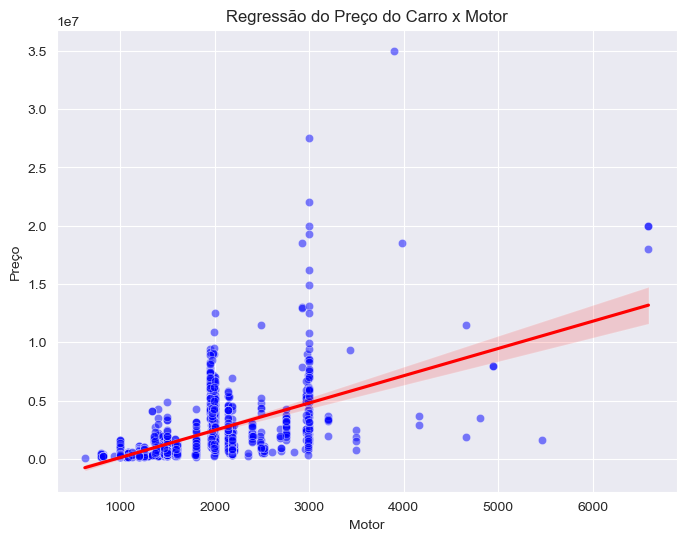

In [ ]:
#Criação do gráfico de regressão
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df2_copy, x='Engine', y='Price', color='blue', alpha=0.5)

# a funcao regplot gera a regressao e a plot da reta
sns.regplot(data=df2_copy, x='Engine', y='Price', scatter=False, color='red')

# definindo titulos
plt.title('Regressão do Preço do Carro x Motor')
plt.xlabel('Motor')
plt.ylabel('Preço')

plt.show()

Ao observar o gráfico de regressão, existe um grande acúmulo de informações na faixa de 1000 e 3000, com muitos outliers presentes - o que "suja" a análise e a amostra. A fim de observar um gráfico melhor, exemplificarei com a correlação entre Fuel Tank Capacity x Engine, que já foi indicado anteriormente que possui uma forte correlação.

In [ ]:
x = sm.add_constant(df2_copy['Fuel Tank Capacity'])
y = df2_copy['Engine']


modelo_engine = sm.OLS(y, x).fit()

modelo_engine.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Engine   R-squared:                       0.638
Model:                            OLS   Adj. R-squared:                  0.638
Method:                 Least Squares   F-statistic:                     3302.
Date:                Fri, 10 May 2024   Prob (F-statistic):               0.00
Time:                        17:48:16   Log-Likelihood:                -13794.
No. Observations:                1874   AIC:                         2.759e+04
Df Residuals:                    1872   BIC:                         2.760e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                -58.2866     31.551     -1.847      0.065    -120.165       3.592
Fuel Tank Capacity    33.3436      0.580     57.464      0.000      32.206      34.482
==============================================================================
Omnibus:                     1325.457   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            48437.739
Skew:                           2.856   Prob(JB):                         0.00
Kurtosis:                      27.243   Cond. No.                         195.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

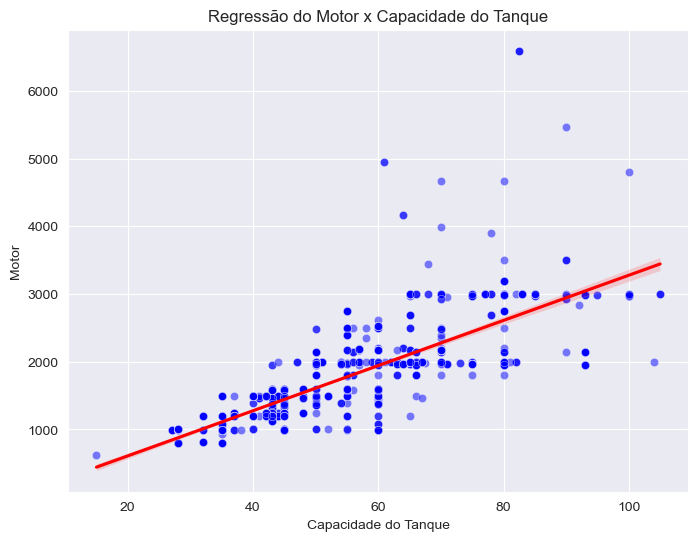

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df2_copy, x='Fuel Tank Capacity', y='Engine', color='blue', alpha=0.5)

# a funcao regplot gera a regressao e a plot da reta
sns.regplot(data=df2_copy, x='Fuel Tank Capacity', y='Engine', scatter=False, color='red')

# definindo titulos
plt.title('Regressão do Motor x Capacidade do Tanque')
plt.xlabel('Capacidade do Tanque')
plt.ylabel('Motor')

plt.show()

Neste segundo exemplo, o r² foi 0.6, o que já indica uma análise mais fidedigna - e o p-valor manteve-se menor que o alpha, indicando a significância do modelo. O gráfico de regressão indica uma correlação linear entre a capacidade do tanque e o motor, indicando que carros com motores mais potentes tendem a ter tanques de combustível maiores. E, visto que o r² foi mais alto, indica que a grande variação dos preços presentes no dataframe influenciou no modelo - e, neste, é perceptível visualmente uma correlação crescente.

### 10. 0. Codifique e exiba o gráfico dos resíduos do modelo de Regressão Simples.


Novamente, irei exibir os gráficos de resíduos dos dois modelos de regressão simples apresentados (Preço x Engine e Fuel Tank Capacity x Engine) e analisar os resíduos.

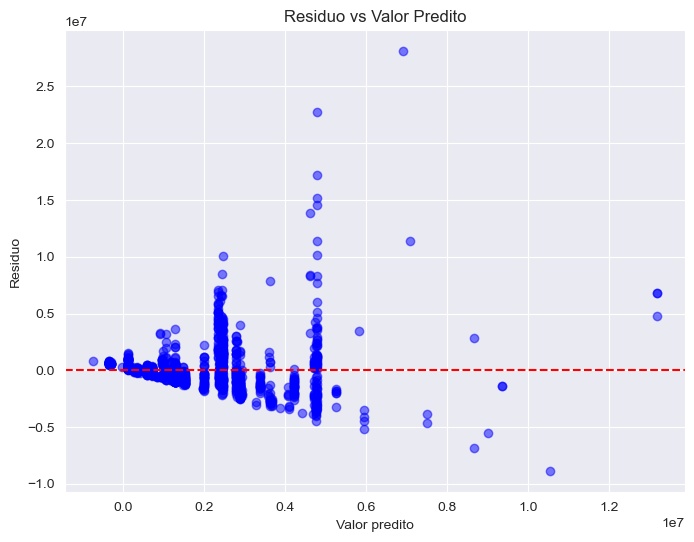

In [ ]:
# Devemos salvar o dado do resíduo
residuo_price = modelo_price.resid
# e calcular o valor predito para verificar o resíduo (valor predito - valor obtido)
predicted_values = modelo_price.fittedvalues

plt.figure(figsize=(8, 6))
plt.scatter(predicted_values, residuo_price, color='blue', alpha=0.5)

# adiciona a linha no zero a fim de melhor visualização de dispersão
plt.axhline(y=0, color='red', linestyle='--')

#Títulos
plt.title('Residuo vs Valor Predito')
plt.xlabel('Valor predito')
plt.ylabel('Residuo')

plt.show()

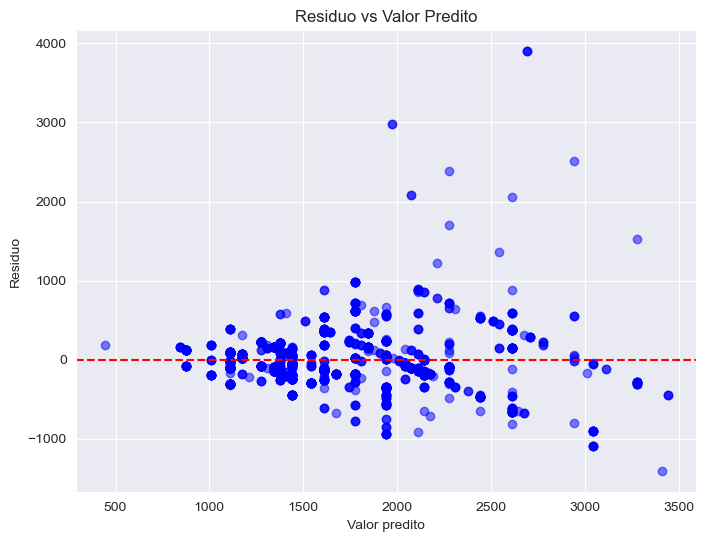

In [ ]:
# Mesma fórmula utilizada anteriormente
residuo_engine = modelo_engine.resid

plt.figure(figsize=(8, 6))
plt.scatter(modelo_engine.fittedvalues, residuo_engine, color='blue', alpha=0.5)

plt.axhline(y=0, color='red', linestyle='--')

plt.title('Residuo vs Valor Predito')
plt.xlabel('Valor predito')
plt.ylabel('Residuo')

plt.show()

Ao verificar os dois gráficos de resíduos, o primeiro modelo (Preço x Engine) possui uma dispersão menor e um resíduo tendecioso, indicando que a análise de regressão foi influenciada por outliers e pela grande variação de preços presentes no dataframe, podendo indiar que a análise escolhida (regressão linear) pode não ser a ideal, podendo sugerir a presença de alguma variável omitida, ou que os dados precisam ser tratados para melhor responderem ao teste (visto que o r² não foi tão satisfatório). Já o segundo modelo (Fuel Tank Capacity x Engine) possui uma dispersão maior e um resíduo mais aleatório, indicando que a análise de regressão foi mais fidedigna e que a correlação entre a capacidade do tanque e o motor é mais significativa.

### 11. Crie um modelo de Regressão Multivariada, exiba a Tabela de Regressão e exiba o gráfico dos resíduos do modelo.

In [ ]:
# Para o modelo de regressão multivariada, devemos selecionar as variáveis com correlacao elevada
high_correlation_variables = df_corr[(df_corr['Price'] > 0.6) | (df_corr['Price'] < -0.6)].index.tolist()
high_correlation_variables.remove('Price')
#Visto que as correlações existentes no heatmap são majoritariamente reduzidas, utilizei como parâmetro o valor 0.6 ou -0.6 para possível correlação.
#E removemos a variável "price" para evitar duplicação.

#Selecionamos as variáveis:
selected_variables = ['Price'] + high_correlation_variables
selected_df = df2_copy[selected_variables]

In [ ]:
# Fit do modelo
X = sm.add_constant(selected_df.drop(columns=['Price']))
y = selected_df['Price']
modelo_multi = sm.OLS(y, X).fit()

print(modelo_multi.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.624
Model:                            OLS   Adj. R-squared:                  0.623
Method:                 Least Squares   F-statistic:                     1034.
Date:                Fri, 10 May 2024   Prob (F-statistic):               0.00
Time:                        17:48:34   Log-Likelihood:                -29293.
No. Observations:                1874   AIC:                         5.859e+04
Df Residuals:                    1870   BIC:                         5.862e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.426e+06   1.03e+05    -13.776      0.0

Ao realizar a regressão multivariada, percebemos uma evolução nos valores de r² e p-valor, indicando uma análise mais fidedigna e significativa. O r² foi de 0.624, indicando uma correlação mais forte entre as variáveis selecionadas e o preço do que a analisada anteriormente na regressão linear simples, mostrando uma melhor validação ao considerar mais variáveis - mantendo o p-valor menor que o alpha, indicando que manteve a significância do modelo.

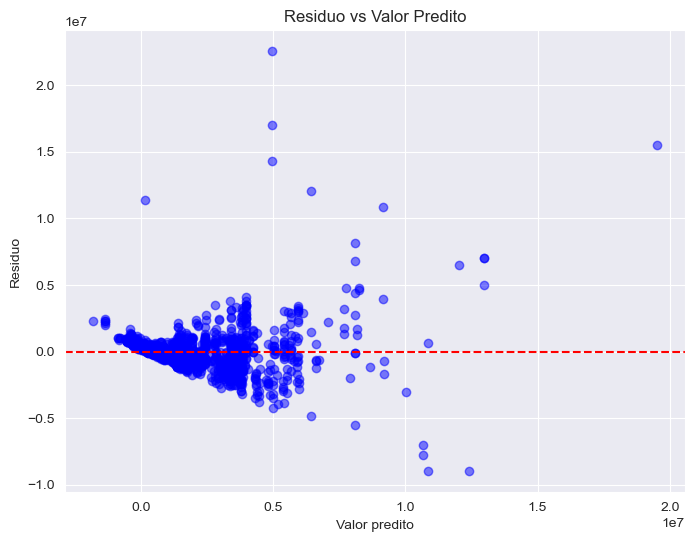

In [ ]:
#ANÁLISE DOS RESÍDUOS

# Salvamos os dados dos resíduos na variável residuos
residuos = modelo_multi.resid

# Calculamos os valores preditos
predicted_values = modelo_multi.fittedvalues

#Verificação através de scatterplot
plt.figure(figsize=(8, 6))
plt.scatter(predicted_values, residuos, color='blue', alpha=0.5)

# adiciona linha
plt.axhline(y=0, color='red', linestyle='--')

# Títulos
plt.title('Residuo vs Valor Predito')
plt.xlabel('Valor predito')
plt.ylabel('Residuo')

plt.show()

É perceptível uma concentração no nosso scatterplot do resíduo, indicando que alguma variável não tenha sido considerada e é importante para a análise. A fim de verificar essa concentração e sua importância com o preço, um gráfico de distribuição dos resíduos seria interessante.

C:\Users\anafs\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


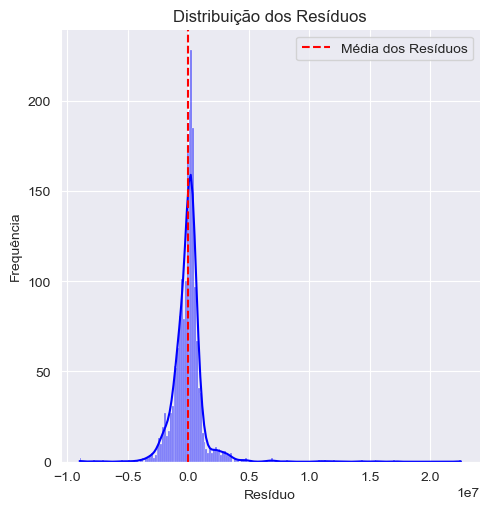

In [ ]:
# Cria o gráfico de distribuição dos resíduos
sns.displot(residuos, kde=True, color='blue')

# Adiciona uma linha para a média dos resíduos
plt.axvline(x=residuos.mean(), color='red', linestyle='--', label='Média dos Resíduos')

# Adiciona uma legenda
plt.legend()

# Adiciona títulos
plt.title('Distribuição dos Resíduos')
plt.xlabel('Resíduo')
plt.ylabel('Frequência')

plt.show()

É visível a presença de uma distribuição normal dos resíduos, indicando que o modelo de regressão multivariada foi bem sucedido, porém existe uma grande frequência de dados em torno da média dos resíduos, indicando a existência de uma grande concentração de valores e indicando que a presença de mais variáveis pode ser importante para a análise, estas que não foram consideradas no modelo anterior, sugerindo futuras investigações.